<a href="https://colab.research.google.com/github/RounakNeogy/RegionalCharacterdetection/blob/main/cmaterDB_LSTM_Batch_Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/Dataset.zip> /dev/null

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 19.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os
import cv2
from PIL import ImageFile,Image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Reshape, LSTM
from keras.callbacks import ReduceLROnPlateau

In [ ]:
train_folder = "Dataset/Train" 
test_folder = "Dataset/Test"
dimensions = (28, 28)

In [ ]:
train_folder = "Dataset/main/train" 
test_folder = "Dataset/main/val"
dimensions = (28, 28)

In [ ]:
def process_images(folder):

    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i=0
    for class_x in classes:
        i=i+1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            print(len(images))
            if folder == "Dataset/Test" and i==1:
                images = images[:-1]

            for image in images:

                img_cnt = img_cnt + 1

                if(img_cnt % 1000 == 0):                # show progress
                    print("Processed %s images" % str(img_cnt))

                im = Image.open(image)
                print(image)
                im = im.resize(dimensions)   # resize image according to dimensions set

                im = im.convert('L')

                image_array = np.array(im)
                otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                im = Image.fromarray(image_result)

                im.save(image)
    print("Finished processing images, images found = ")
    print(img_cnt)
process_images(train_folder)
process_images(test_folder)

Streaming output truncated to the last 5000 lines.
Dataset/main/train/204/bcc000179.bmp
Dataset/main/train/204/bcc000180.bmp
Dataset/main/train/204/bcc000182.bmp
Dataset/main/train/204/bcc000183.bmp
Dataset/main/train/204/bcc000184.bmp
Dataset/main/train/204/bcc000185.bmp
Dataset/main/train/204/bcc000186.bmp
Dataset/main/train/204/bcc000188.bmp
Dataset/main/train/204/bcc000189.bmp
Dataset/main/train/204/bcc000190.bmp
Dataset/main/train/204/bcc000191.bmp
Dataset/main/train/204/bcc000192.bmp
Dataset/main/train/204/bcc000193.bmp
Dataset/main/train/204/bcc000195.bmp
Dataset/main/train/204/bcc000196.bmp
Dataset/main/train/204/bcc000197.bmp
Dataset/main/train/204/bcc000199.bmp
Dataset/main/train/204/bcc000200.bmp
Dataset/main/train/204/bcc000201.bmp
Dataset/main/train/204/bcc000203.bmp
Dataset/main/train/204/bcc000204.bmp
Dataset/main/train/204/bcc000205.bmp
Dataset/main/train/204/bcc000206.bmp
Dataset/main/train/204/bcc000207.bmp
Dataset/main/train/204/bcc000208.bmp
Dataset/main/train/204/b

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = "same", input_shape = (28, 28, 1)))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Reshape((3,3*128),input_shape=(3,3,128)))
classifier.add(LSTM(128, return_sequences=True))

classifier.add(Flatten())

classifier.add(Dense(units = 128))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 64))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

opt=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95)              
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_39 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)      

In [ ]:
train_folder = "/content/Dataset/main/train"
val_folder = "/content/Dataset/main/val"
test_folder = "/content/Dataset/Test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set = test_datagen.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 10800 images belonging to 50 classes.
Found 1200 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [ ]:
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights1.h5')

Epoch 1/50
338/338 [==============================] - 14s 29ms/step - loss: 3.8567 - accuracy: 0.0394 - val_loss: 3.6179 - val_accuracy: 0.1175
Epoch 2/50
338/338 [==============================] - 8s 23ms/step - loss: 3.4524 - accuracy: 0.1144 - val_loss: 2.8366 - val_accuracy: 0.2725
Epoch 3/50
338/338 [==============================] - 9s 27ms/step - loss: 2.9429 - accuracy: 0.2035 - val_loss: 2.2740 - val_accuracy: 0.3917
Epoch 4/50
338/338 [==============================] - 9s 28ms/step - loss: 2.5885 - accuracy: 0.2752 - val_loss: 1.9319 - val_accuracy: 0.4642
Epoch 5/50
338/338 [==============================] - 8s 24ms/step - loss: 2.3124 - accuracy: 0.3352 - val_loss: 1.7097 - val_accuracy: 0.5275
Epoch 6/50
338/338 [==============================] - 9s 28ms/step - loss: 2.1019 - accuracy: 0.3831 - val_loss: 1.5831 - val_accuracy: 0.5492
Epoch 7/50
338/338 [==============================] - 10s 28ms/step - loss: 1.9529 - accuracy: 0.4258 - val_loss: 1.3203 - val_accuracy: 0.62

In [66]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 14ms/step - loss: 0.2383 - accuracy: 0.9300


[0.2383180558681488, 0.9300000071525574]

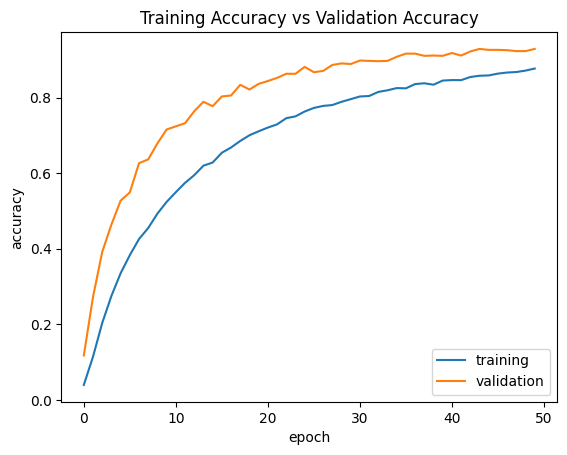

In [67]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

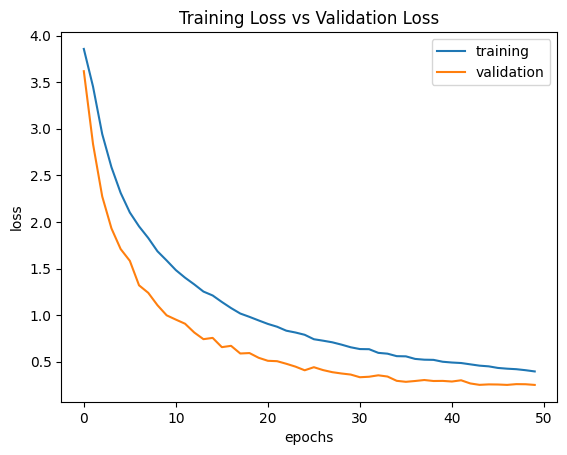

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()
     

In [69]:
classifier.load_weights('train_weights1.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights2.h5')

Epoch 1/50
338/338 [==============================] - 10s 29ms/step - loss: 0.3988 - accuracy: 0.8726 - val_loss: 0.2540 - val_accuracy: 0.9225
Epoch 2/50
338/338 [==============================] - 10s 29ms/step - loss: 0.3830 - accuracy: 0.8809 - val_loss: 0.2549 - val_accuracy: 0.9250
Epoch 3/50
338/338 [==============================] - 9s 26ms/step - loss: 0.3883 - accuracy: 0.8770 - val_loss: 0.2474 - val_accuracy: 0.9275
Epoch 4/50
338/338 [==============================] - 8s 24ms/step - loss: 0.3827 - accuracy: 0.8802 - val_loss: 0.2556 - val_accuracy: 0.9267
Epoch 5/50
338/338 [==============================] - 9s 28ms/step - loss: 0.3575 - accuracy: 0.8850 - val_loss: 0.2430 - val_accuracy: 0.9250
Epoch 6/50
338/338 [==============================] - 10s 28ms/step - loss: 0.3575 - accuracy: 0.8896 - val_loss: 0.2454 - val_accuracy: 0.9308
Epoch 7/50
338/338 [==============================] - 9s 26ms/step - loss: 0.3455 - accuracy: 0.8888 - val_loss: 0.2232 - val_accuracy: 0.9

In [70]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 13ms/step - loss: 0.1735 - accuracy: 0.9510


[0.1735299527645111, 0.9509999752044678]

In [71]:
classifier.load_weights('train_weights2.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 30,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights3.h5')

Epoch 1/30
338/338 [==============================] - 9s 27ms/step - loss: 0.1959 - accuracy: 0.9372 - val_loss: 0.1748 - val_accuracy: 0.9492
Epoch 2/30
338/338 [==============================] - 8s 23ms/step - loss: 0.1981 - accuracy: 0.9364 - val_loss: 0.1712 - val_accuracy: 0.9508
Epoch 3/30
338/338 [==============================] - 10s 31ms/step - loss: 0.1992 - accuracy: 0.9382 - val_loss: 0.1781 - val_accuracy: 0.9475
Epoch 4/30
338/338 [==============================] - 9s 28ms/step - loss: 0.1932 - accuracy: 0.9390 - val_loss: 0.1730 - val_accuracy: 0.9492
Epoch 5/30
338/338 [==============================] - 8s 23ms/step - loss: 0.1856 - accuracy: 0.9425 - val_loss: 0.1723 - val_accuracy: 0.9492
Epoch 6/30
338/338 [==============================] - 9s 27ms/step - loss: 0.1900 - accuracy: 0.9400 - val_loss: 0.1806 - val_accuracy: 0.9508
Epoch 7/30
338/338 [==============================] - 9s 27ms/step - loss: 0.1821 - accuracy: 0.9427 - val_loss: 0.1756 - val_accuracy: 0.945

In [72]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 13ms/step - loss: 0.1619 - accuracy: 0.9563


[0.16194510459899902, 0.956333339214325]

In [73]:
classifier.load_weights('train_weights3.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights4.h5')

Epoch 1/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1496 - accuracy: 0.9513 - val_loss: 0.1669 - val_accuracy: 0.9492
Epoch 2/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1517 - accuracy: 0.9517 - val_loss: 0.1682 - val_accuracy: 0.9525
Epoch 3/10
338/338 [==============================] - 9s 27ms/step - loss: 0.1433 - accuracy: 0.9544 - val_loss: 0.1673 - val_accuracy: 0.9508
Epoch 4/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1401 - accuracy: 0.9550 - val_loss: 0.1691 - val_accuracy: 0.9475
Epoch 5/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1391 - accuracy: 0.9552 - val_loss: 0.1697 - val_accuracy: 0.9517
Epoch 6/10
338/338 [==============================] - 9s 27ms/step - loss: 0.1476 - accuracy: 0.9537 - val_loss: 0.1686 - val_accuracy: 0.9542
Epoch 7/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1488 - accuracy: 0.9508 - val_loss: 0.1663 - val_accuracy: 0.9500

In [75]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 13ms/step - loss: 0.1661 - accuracy: 0.9553


[0.16611748933792114, 0.9553333520889282]

In [76]:
classifier.load_weights('train_weights4.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights5.h5')

Epoch 1/10
338/338 [==============================] - 8s 24ms/step - loss: 0.1342 - accuracy: 0.9582 - val_loss: 0.1638 - val_accuracy: 0.9550
Epoch 2/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1374 - accuracy: 0.9543 - val_loss: 0.1677 - val_accuracy: 0.9542
Epoch 3/10
338/338 [==============================] - 9s 27ms/step - loss: 0.1299 - accuracy: 0.9573 - val_loss: 0.1633 - val_accuracy: 0.9517
Epoch 4/10
338/338 [==============================] - 8s 23ms/step - loss: 0.1285 - accuracy: 0.9571 - val_loss: 0.1622 - val_accuracy: 0.9542
Epoch 5/10
338/338 [==============================] - 11s 34ms/step - loss: 0.1299 - accuracy: 0.9583 - val_loss: 0.1668 - val_accuracy: 0.9550
Epoch 6/10
338/338 [==============================] - 8s 24ms/step - loss: 0.1219 - accuracy: 0.9609 - val_loss: 0.1720 - val_accuracy: 0.9550
Epoch 7/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1297 - accuracy: 0.9581 - val_loss: 0.1678 - val_accuracy: 0.948

In [77]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 13ms/step - loss: 0.1591 - accuracy: 0.9590


[0.15911860764026642, 0.9589999914169312]

In [78]:
classifier.load_weights('train_weights5.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights6.h5')

Epoch 1/10
338/338 [==============================] - 8s 23ms/step - loss: 0.1242 - accuracy: 0.9622 - val_loss: 0.1693 - val_accuracy: 0.9492
Epoch 2/10
338/338 [==============================] - 10s 29ms/step - loss: 0.1178 - accuracy: 0.9606 - val_loss: 0.1727 - val_accuracy: 0.9500
Epoch 3/10
338/338 [==============================] - 10s 28ms/step - loss: 0.1203 - accuracy: 0.9595 - val_loss: 0.1702 - val_accuracy: 0.9475
Epoch 4/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1224 - accuracy: 0.9597 - val_loss: 0.1794 - val_accuracy: 0.9458
Epoch 5/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1121 - accuracy: 0.9638 - val_loss: 0.1705 - val_accuracy: 0.9525
Epoch 6/10
338/338 [==============================] - 10s 30ms/step - loss: 0.1249 - accuracy: 0.9606 - val_loss: 0.1718 - val_accuracy: 0.9533
Epoch 7/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1150 - accuracy: 0.9635 - val_loss: 0.1775 - val_accuracy: 0.9

In [79]:
classifier.evaluate(test_set)

94/94 [==============================] - 2s 20ms/step - loss: 0.1607 - accuracy: 0.9603


[0.16072632372379303, 0.9603333473205566]

In [80]:
classifier.load_weights('train_weights6.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights7.h5')

Epoch 1/10
338/338 [==============================] - 10s 29ms/step - loss: 0.1133 - accuracy: 0.9644 - val_loss: 0.1746 - val_accuracy: 0.9483
Epoch 2/10
338/338 [==============================] - 9s 27ms/step - loss: 0.1192 - accuracy: 0.9610 - val_loss: 0.1694 - val_accuracy: 0.9475
Epoch 3/10
338/338 [==============================] - 9s 27ms/step - loss: 0.1141 - accuracy: 0.9627 - val_loss: 0.1652 - val_accuracy: 0.9492
Epoch 4/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1172 - accuracy: 0.9634 - val_loss: 0.1606 - val_accuracy: 0.9500
Epoch 5/10
338/338 [==============================] - 8s 24ms/step - loss: 0.1139 - accuracy: 0.9629 - val_loss: 0.1575 - val_accuracy: 0.9525
Epoch 6/10
338/338 [==============================] - 8s 23ms/step - loss: 0.1091 - accuracy: 0.9645 - val_loss: 0.1666 - val_accuracy: 0.9558
Epoch 7/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1128 - accuracy: 0.9636 - val_loss: 0.1606 - val_accuracy: 0.956

In [82]:
classifier.evaluate(test_set)

94/94 [==============================] - 2s 21ms/step - loss: 0.1583 - accuracy: 0.9570


[0.1582503616809845, 0.9570000171661377]

In [83]:
classifier.load_weights('train_weights7.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights8.h5')

Epoch 1/10
338/338 [==============================] - 9s 26ms/step - loss: 0.1082 - accuracy: 0.9632 - val_loss: 0.1537 - val_accuracy: 0.9567
Epoch 2/10
338/338 [==============================] - 10s 29ms/step - loss: 0.1079 - accuracy: 0.9635 - val_loss: 0.1541 - val_accuracy: 0.9567
Epoch 3/10
338/338 [==============================] - 10s 30ms/step - loss: 0.1123 - accuracy: 0.9619 - val_loss: 0.1544 - val_accuracy: 0.9558
Epoch 4/10
338/338 [==============================] - 8s 24ms/step - loss: 0.1070 - accuracy: 0.9652 - val_loss: 0.1475 - val_accuracy: 0.9608
Epoch 5/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1044 - accuracy: 0.9667 - val_loss: 0.1465 - val_accuracy: 0.9583
Epoch 6/10
338/338 [==============================] - 10s 29ms/step - loss: 0.1091 - accuracy: 0.9660 - val_loss: 0.1545 - val_accuracy: 0.9558
Epoch 7/10
338/338 [==============================] - 8s 23ms/step - loss: 0.1094 - accuracy: 0.9645 - val_loss: 0.1450 - val_accuracy: 0.9

In [84]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 15ms/step - loss: 0.1605 - accuracy: 0.9610


[0.16052551567554474, 0.9610000252723694]

In [85]:
classifier.load_weights('train_weights8.h5')
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 10,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights9.h5')

Epoch 1/10
338/338 [==============================] - 9s 26ms/step - loss: 0.0997 - accuracy: 0.9665 - val_loss: 0.1557 - val_accuracy: 0.9550
Epoch 2/10
338/338 [==============================] - 9s 28ms/step - loss: 0.1012 - accuracy: 0.9666 - val_loss: 0.1673 - val_accuracy: 0.9517
Epoch 3/10
338/338 [==============================] - 9s 25ms/step - loss: 0.1008 - accuracy: 0.9676 - val_loss: 0.1600 - val_accuracy: 0.9550
Epoch 4/10
338/338 [==============================] - 9s 27ms/step - loss: 0.0902 - accuracy: 0.9695 - val_loss: 0.1550 - val_accuracy: 0.9533
Epoch 5/10
338/338 [==============================] - 9s 28ms/step - loss: 0.0964 - accuracy: 0.9699 - val_loss: 0.1664 - val_accuracy: 0.9550
Epoch 6/10
338/338 [==============================] - 10s 30ms/step - loss: 0.0993 - accuracy: 0.9676 - val_loss: 0.1597 - val_accuracy: 0.9583
Epoch 7/10
338/338 [==============================] - 8s 23ms/step - loss: 0.0991 - accuracy: 0.9675 - val_loss: 0.1618 - val_accuracy: 0.954

In [86]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 14ms/step - loss: 0.1600 - accuracy: 0.9617


[0.1599516123533249, 0.9616666436195374]